In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
#Dataframe to be used for EDA and modelling 
df = pd.read_stata("data/5pct_sample_2019_10.dta")

In [3]:
df.head()

,date,shop_code,region,price,item
0,323,188,Catalogue collections,52.000000,349
1,326,188,Catalogue collections,77.000000,349
2,332,188,Catalogue collections,49.000000,349
3,328,203,Catalogue collections,37.000000,349
4,337,203,Catalogue collections,39.990002,349


In [4]:
df.shape

(1771521, 5)

In [5]:
df1 = df[(df['item']== 250)|(df['item']== 266)]
df1.shape

(4812, 5)

In [6]:
#Dataframe to be used for further analysis
perc = pd.read_csv("data/percentiles_2019_10.csv")

In [7]:
perc1 = perc[(perc['item']== 250)|(perc['item']== 266)]
perc1.shape

(499, 11)

In [8]:
perc.head()

,date,item,p10,p20,p30,p40,p50,p60,p70,p80,p90
0,1,1,0.40,0.41,0.41,0.43,0.45,0.52,0.55,0.55,0.57
1,1,2,0.52,0.55,0.56,0.58,0.59,0.59,0.60,0.60,0.61
2,1,3,0.52,0.58,0.59,0.59,0.61,0.62,0.62,0.63,0.64
3,1,4,0.36,0.42,0.45,0.46,0.48,0.48,0.54,0.54,0.60
4,1,13,0.44,0.47,0.47,0.50,0.53,0.53,0.53,0.53,0.54


In [9]:
#df1.merge(perc1,on=['date','item']).head(30)

In [10]:
db_date = pd.read_csv("data/db_date.csv")

In [11]:
db_date.head()

,date,quote_date,obs_panel,obs,date2,date3,year,year_s,month,month_s,...,p_sd,cpiindex00allitems2015100,cpiindex012nonalcoholicbeverages,cpiindex011food2015100,cpiindex02alcoholicbeveragestoba,cpiindex01foodandnonalcoholicbev,cpi00_adjustment,day,day_s,date4
0,1,198802,35459,51065,01-02-1988,01-02-1988,1988,1988.0,2,2.0,...,54.338814,48.6,45.9,48.5,27.4,48.3,1.000000,1.0,1.0,1988-02-01
1,2,198803,35240,49987,01-03-1988,01-03-1988,1988,1988.0,3,3.0,...,51.615620,48.7,46.2,48.6,27.5,48.4,1.002058,1.0,1.0,1988-03-01
2,3,198804,36066,51716,01-04-1988,01-04-1988,1988,1988.0,4,4.0,...,53.485882,49.3,46.6,48.9,27.9,48.7,1.014403,1.0,1.0,1988-04-01
3,4,198805,35869,51209,01-05-1988,01-05-1988,1988,1988.0,5,5.0,...,53.936596,49.5,47.2,49.0,28.0,48.8,1.018519,1.0,1.0,1988-05-01
4,5,198806,35811,51126,01-06-1988,01-06-1988,1988,1988.0,6,6.0,...,53.684380,49.7,47.7,49.0,28.0,48.9,1.022634,1.0,1.0,1988-06-01


In [12]:
#cols to drop
cols = ['quote_date','obs_panel', 'obs', 'date3', 'year', 'year_s', 'month',
       'month_s', 'quarter', 'p_min', 'p_max', 'p_mean', 'p_med', 'p_sd',
       'cpiindex012nonalcoholicbeverages',
       'cpiindex02alcoholicbeveragestoba',
       'cpiindex01foodandnonalcoholicbev', 'cpi00_adjustment', 'day', 'day_s',
       'date4']

In [13]:
db_date.drop(columns = cols,inplace = True)

In [14]:
db_date.head()

,date,date2,cpiindex00allitems2015100,cpiindex011food2015100
0,1,01-02-1988,48.6,48.5
1,2,01-03-1988,48.7,48.6
2,3,01-04-1988,49.3,48.9
3,4,01-05-1988,49.5,49.0
4,5,01-06-1988,49.7,49.0


In [15]:
db_date.rename(columns = {'cpiindex00allitems2015100':'cpi_allitems','cpiindex011food2015100':'cpi_food'},inplace = True)

In [16]:
new_df = df1.merge(db_date, on = 'date')

In [17]:
new_df.head()

,date,shop_code,region,price,item,date2,cpi_allitems,cpi_food
0,23,1,London,0.99,250,01-12-1989,53.4,53.5
1,23,21,South East,0.99,250,01-12-1989,53.4,53.5
2,23,32,South West,1.00,250,01-12-1989,53.4,53.5
3,23,901,South West,0.89,250,01-12-1989,53.4,53.5
4,23,107,East Anglia,0.84,250,01-12-1989,53.4,53.5


In [18]:
new_df.shape

(4812, 8)

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4812 entries, 0 to 4811
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   date          4812 non-null   int16   
 1   shop_code     4812 non-null   int16   
 2   region        4812 non-null   category
 3   price         4812 non-null   float32 
 4   item          4812 non-null   int16   
 5   date2         4812 non-null   object  
 6   cpi_allitems  4812 non-null   float64 
 7   cpi_food      4812 non-null   float64 
dtypes: category(1), float32(1), float64(2), int16(3), object(1)
memory usage: 202.7+ KB


In [20]:
new_df.drop(columns = 'date',inplace = True)

In [21]:
new_df['Date'] = pd.to_datetime(new_df["date2"],format="%d-%m-%Y")

In [22]:


new_df['Year'] = new_df['Date'].dt.year
new_df['Month'] = new_df['Date'].dt.month

In [23]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4812 entries, 0 to 4811
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   shop_code     4812 non-null   int16         
 1   region        4812 non-null   category      
 2   price         4812 non-null   float32       
 3   item          4812 non-null   int16         
 4   date2         4812 non-null   object        
 5   cpi_allitems  4812 non-null   float64       
 6   cpi_food      4812 non-null   float64       
 7   Date          4812 non-null   datetime64[ns]
 8   Year          4812 non-null   int64         
 9   Month         4812 non-null   int64         
dtypes: category(1), datetime64[ns](1), float32(1), float64(2), int16(2), int64(2), object(1)
memory usage: 306.1+ KB


## EXPLORATORY DATA ANALYSIS

In [24]:
sns.set(rc={'figure.figsize':(15,8)})

<AxesSubplot:xlabel='Month', ylabel='price'>

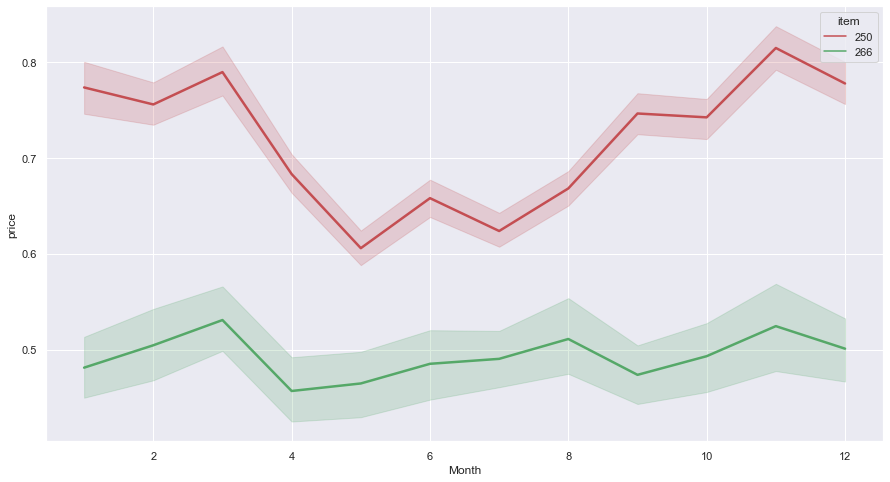

In [25]:
#comparing lettuce prices in different times of the year
sns.lineplot(data=new_df, x="Month", y="price", hue="item",palette=['r', 'g'], linewidth=2.5)

<AxesSubplot:xlabel='price', ylabel='region'>

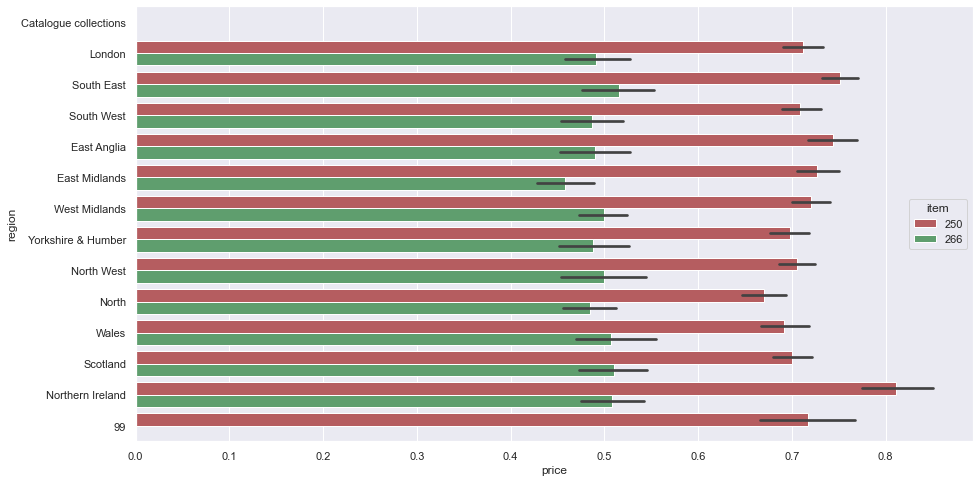

In [26]:
#Seeing the distribution of prices of different regions in the UK
sns.barplot(x="price", y="region", hue="item", data=new_df,palette=['r', 'g'] )

<AxesSubplot:xlabel='Year', ylabel='price'>

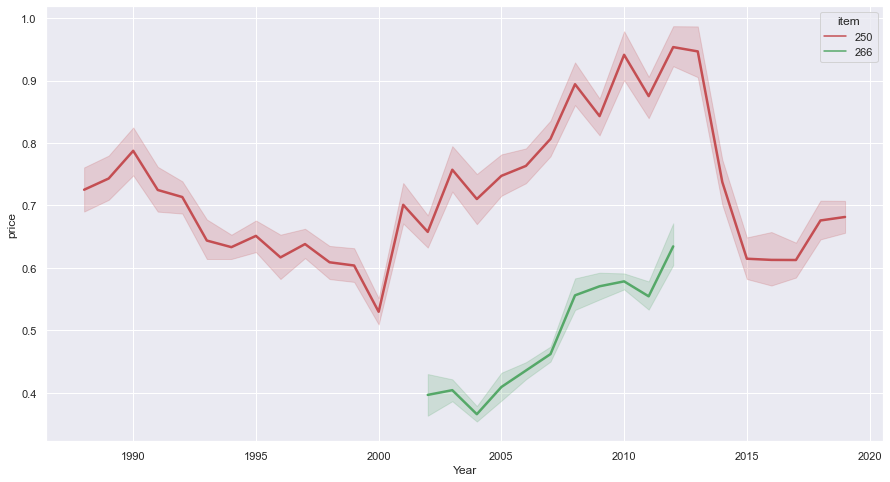

In [27]:
#comparing lettuce prices in different years
sns.lineplot(data=new_df, x="Year", y="price", hue="item",palette=['r', 'g'], linewidth=2.5)

In [28]:
data_08 = np.where(new_df['Year'] == 2008)

In [29]:
df_08 = new_df.loc[data_08]

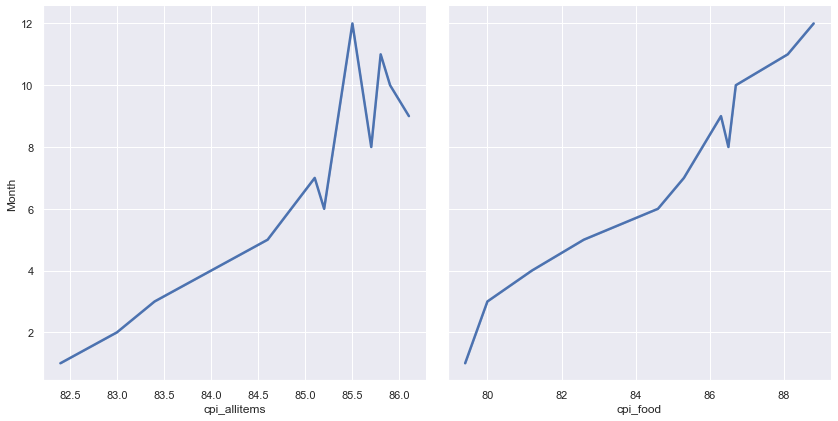

In [30]:
#CPI of all items and food in the year 2008
g = sns.PairGrid(df_08, x_vars=["cpi_allitems","cpi_food"], y_vars=["Month"],height = 6)
g.map(sns.lineplot, linewidth=2.5)

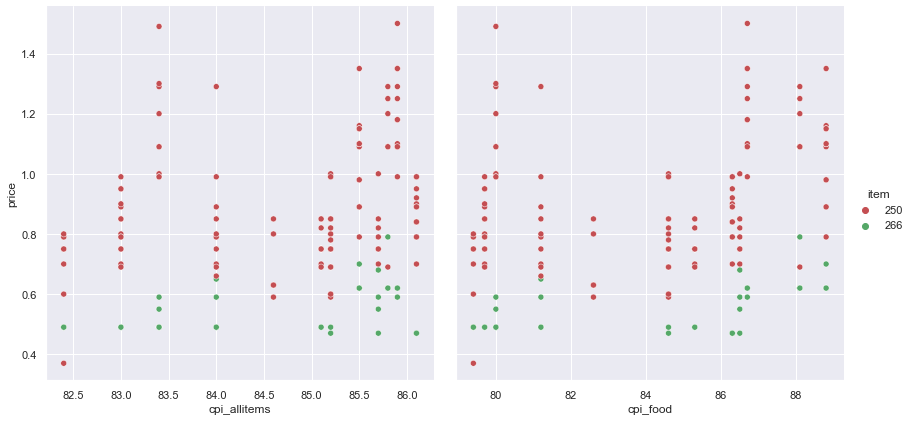

In [31]:
g = sns.PairGrid(df_08, x_vars=["cpi_allitems","cpi_food"], y_vars=["price"],palette=['r', 'g'], hue = 'item',height = 6)
g.map(sns.scatterplot)
g.add_legend()

<AxesSubplot:xlabel='Month', ylabel='price'>

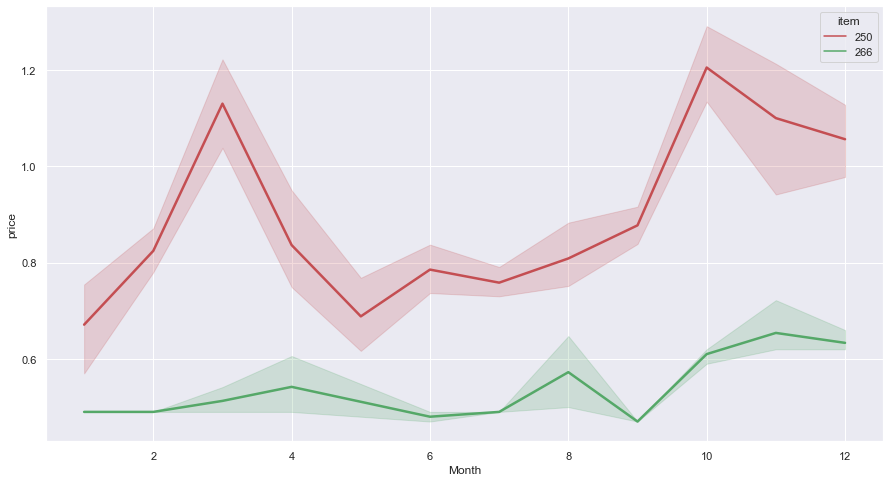

In [32]:
sns.lineplot(data=df_08, x="Month", y="price", hue="item",palette=['r', 'g'], linewidth=2.5)